In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('Data/digit_recognizer/train.csv')
print(train.shape)
train.sample()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
25356,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'label: 8')

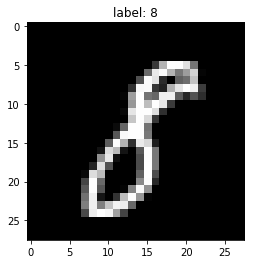

In [4]:
index = 5000

# .reshape(28, 28) : 28 x 28 로 끊어서 모양을 다시 잡아준다
plt.imshow(train.iloc[index, 1:].values.reshape(28, 28), cmap='gray')
plt.title('label: {}'.format(train.iloc[index, 0]))

# 변수 설정

In [5]:
X = train.drop('label', axis=1)
y = train['label']

# Hold-out Validation
train - validation 셋으로 데이터를 한 번 나누면 끝

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# train 데이터를 train 과 validation set 으로 나눠준다
# 분할 비율 정해주지 않으면 0.25 가 Default
# 데이터 사이즈가 충분히 크면 validation set 크기를 줄인다, 학습을 더 잘하기 위해
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.05)

### Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
randomforest = RandomForestClassifier()

In [10]:
randomforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
# randomforest.feature_importances_
prediction = randomforest.predict(X_validation)

evaluation = pd.DataFrame(y_validation)
evaluation['prediction'] = prediction
evaluation

,label,prediction
6094,3,3
14548,1,1
1425,6,1
36318,5,5
12070,1,1
34087,7,9
19391,2,2
8359,4,4
39497,8,8
10371,0,0


# Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
# groupby 로 confusion matrix 그리기
evaluation.groupby(['label', 'prediction']).size()

label  prediction
0      0             224
       2               2
       5               1
       6               1
       7               1
       8               2
       9               1
1      1             221
       4               1
       6               1
       8               1
2      0               1
       1               1
       2             205
       3               1
       4               1
       5               1
       6               1
       7               6
       8               1
3      1               2
       2               9
       3             187
       5               3
       7               1
       8               3
       9               4
4      2               1
       4             191
       5               1
                    ... 
6      2               1
       3               1
       4               1
       5               3
       6             155
       8               1
7      1               1
       2               2
       

In [15]:
confusion_matrix(y_validation, prediction)

array([[224,   0,   2,   0,   0,   1,   1,   1,   2,   1],
       [  0, 221,   0,   0,   1,   0,   1,   0,   1,   0],
       [  1,   1, 205,   1,   1,   1,   1,   6,   1,   0],
       [  0,   2,   9, 187,   0,   3,   0,   1,   3,   4],
       [  0,   0,   1,   0, 191,   1,   0,   1,   0,   6],
       [  1,   1,   2,   5,   1, 168,   0,   0,   4,   0],
       [  0,   1,   1,   1,   1,   3, 155,   0,   1,   0],
       [  0,   1,   2,   2,   2,   1,   0, 226,   0,   6],
       [  0,   1,   5,   8,   3,   4,   1,   1, 187,   4],
       [  0,   1,   4,   3,  10,   2,   0,   4,   2, 192]], dtype=int64)

## Classfication Report 읽기
Confusion Matrix 와 지표 한번에 보여준다

In [16]:
from sklearn.metrics import classification_report

In [17]:
# macro avg : 단순 평균
# weighted avg : label 갯수를 반영한 가중평균
print(classification_report(evaluation['label'], evaluation['prediction']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       232
           1       0.97      0.99      0.98       224
           2       0.89      0.94      0.91       218
           3       0.90      0.89      0.90       209
           4       0.91      0.95      0.93       200
           5       0.91      0.92      0.92       182
           6       0.97      0.95      0.96       163
           7       0.94      0.94      0.94       240
           8       0.93      0.87      0.90       214
           9       0.90      0.88      0.89       218

    accuracy                           0.93      2100
   macro avg       0.93      0.93      0.93      2100
weighted avg       0.93      0.93      0.93      2100



class 마다 다른 모델로 예측할 수 있다

    → Ensembel 의 한가지

# KNN Classifier
K-Nearest Neighbor

성능이 좋지만 예측하는 데 오래걸린다
- 각 데이터 간의 거리를 하나하나 다 계산하고
- top K 개를 뽑아야 한다

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_jobs=2, n_neighbors=3)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=2, n_neighbors=3, p=2,
                     weights='uniform')

In [26]:
prediction = knn.predict(X_validation)

In [30]:
pd.DataFrame(prediction).to_csv('Data/digit_recognizer/knn_prediction.csv', index=False)

In [ ]:
# Assignment 1. Multi-layer Perceptron 구현해보기
# Assignment 2. mlp 의 confusion matrix, classification report 그려보고 해석하기
# Assignment 3. 잘못 분류된 데이터 시각화 해보기
# Assignment 4. 성능 약간 개선해보기
# Assignment 5. 최종적으로 가장 높은 성능을 보이는 모델로 test predict 를 해보고 캐글에 제출해보기

# Multi-layer Perceptron Classifier

In [32]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPclassfier

# miss_classification
잘못 예측한 데이터를 하나씩 까보면서 개선할 수 있다

    e.g. 4 -> 9 잘못 예측하는 경우 
    
        동그라미 갯수를 세주는 피쳐를 추가해준다

# Cross-Validation
Hold-out validation 의 경우 validation 셋에 중요한 피쳐가 모두 들어간 경우 학습능력이 떨어진다

보완하기 위해서 Cross-Validation 을 한다

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
# 5 번의 Cross-Validation 진행한 결과 accuracy 를 각각 출력
cross_val_score(randomforest, X, y, cv=5, scoring='accuracy')

array([0.93408685, 0.93787933, 0.93582569, 0.93878766, 0.94104335])

In [21]:
cross_val_score(randomforest, X, y, cv=5, scoring='precision')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [22]:
cross_val_score(randomforest, X, y, cv=5, scoring='recall')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# ROC Curve
with Hold-out Validation

ROC Curve 를 그리려면 Prediction Probability 가 필요하다

- Prediction 은 label 0, label 1 중에 결정해서 값 하나만 출력
- Prediction Probability 은 label 0, label 1 이 될 확률을 각각 출력

    → multi-class classifier 라면 확률을 class 갯수만큼 출력

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# label 0 , label 1 에 대한 Probability 가 각각 따로 나온다
randomforest.predict_proba(X_validation)

In [ ]:
y_probability = randomforest.predict_proba(X_validation)[:, 1]
y_probability

In [ ]:
# fpr False Positive Rate: fell-out
# tpr True Positive Rate: recall
fpr, tpr, threshold = roc_curve(y_validation, y_probability)

# auc: Area Under Curve
auc_score = roc_auc_score(y_validation, y_probability)

In [ ]:
# x 축을 fpr, y 축을 tpr 로 하는 그래프 그리기
plt.plot(fpr, tpr
         , label='AUC = %0.2f' % (auc_score)
        )

# 45 도 각도 점선 그리기
plt.plot([0, 1], [0, 1], 'r--', label='Chance')

# x 라벨과 y 라벨 이름 붙여주기
plt.xlabel('Fall-out Rate')
plt.ylabel('Recall')

# 각 그래프의 legend 출력하기, 위치 정해주기
plt.legend(loc='best')
plt.show()